## <center> Final Project by Lexi Gilliam <br>
<center>"On my honor, as a student, I have neither given nor received unauthorized aid on this academic work."

# <center>Part 1:<br><br>Business Understanding, Data Understanding, and Data Preparation

# 1. Business Understanding

### What are the project’s goals? 

- to predict movie success before the movie is released based upon IMBD ratings and Facebook popularity

### If you’re hired as a data/business analyst to predict how well a movie will perform in theaters, what kind of data would you collect?

- I would collect data of previous movies and how well they've done in the past, the budget of the movie, box office sales of the movie, a rating of the movie, and how well the main actor/actress has done in the past

### What variables are highly correlated to imdb score? In this project, you will use imdb_score to measure a movie’s success.

- duration of the film
- facebook popularity of director
- facebook popularity of the top 3 actors/actresses
- the number of faces in a movie poster

# 2. Data Understanding

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [0]:
#show all columns
pd.set_option('display.max_colwidth',-1)
pd.set_option('display.max_columns', None)

In [3]:
#because I'm using google, I have to mount the drive
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive/


In [4]:
!ls

drive  sample_data


In [0]:
mov=pd.read_csv("/content/drive/My Drive/Colab Notebooks/moviedata.csv")

In [6]:
mov.head(2)

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_tt_tt_1,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pirate|singapore,http://www.imdb.com/title/tt0449088/?ref_=fn_tt_tt_1,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0


In [7]:
mov['genres'] = mov['genres'].str.replace('|', ',')
mov.head() 

# https://stackoverflow.com/questions/50278300/convert-a-columns-of-string-to-list-in-pandas
mov['genres'] = mov['genres'].str.split(',')
mov.head()

# https://stackoverflow.com/questions/47786822/how-do-you-one-hot-encode-columns-with-a-list-of-strings-as-values
mov1 = mov['genres'].str.join('|').str.get_dummies()

# join
mov = mov.join(mov1)
mov.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,Film-Noir,Game-Show,History,Horror,Music,Musical,Mystery,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Thriller,War,Western
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,"[Action, Adventure, Fantasy, Sci-Fi]",CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_tt_tt_1,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,"[Action, Adventure, Fantasy]",Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pirate|singapore,http://www.imdb.com/title/tt0449088/?ref_=fn_tt_tt_1,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,"[Action, Adventure, Thriller]",Christoph Waltz,Spectre,275868,11700,Stephanie Sigman,1.0,bomb|espionage|sequel|spy|terrorist,http://www.imdb.com/title/tt2379713/?ref_=fn_tt_tt_1,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,"[Action, Thriller]",Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,0.0,deception|imprisonment|lawlessness|police officer|terrorist plot,http://www.imdb.com/title/tt1345836/?ref_=fn_tt_tt_1,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,[Documentary],Doug Walker,Star Wars: Episode VII - The Force Awakens,8,143,NaN,0.0,NaN,http://www.imdb.com/title/tt5289954/?ref_=fn_tt_tt_1,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [8]:
mov.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 54 columns):
color                        5024 non-null object
director_name                4939 non-null object
num_critic_for_reviews       4993 non-null float64
duration                     5028 non-null float64
director_facebook_likes      4939 non-null float64
actor_3_facebook_likes       5020 non-null float64
actor_2_name                 5030 non-null object
actor_1_facebook_likes       5036 non-null float64
gross                        4159 non-null float64
genres                       5043 non-null object
actor_1_name                 5036 non-null object
movie_title                  5043 non-null object
num_voted_users              5043 non-null int64
cast_total_facebook_likes    5043 non-null int64
actor_3_name                 5020 non-null object
facenumber_in_poster         5030 non-null float64
plot_keywords                4890 non-null object
movie_imdb_link              5043 non-

### Describe data

In [9]:
mov.describe()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,Film-Noir,Game-Show,History,Horror,Music,Musical,Mystery,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Thriller,War,Western
count,4993.000000,5028.000000,4939.000000,5020.000000,5036.000000,4.159000e+03,5.043000e+03,5043.000000,5030.000000,5022.000000,4.551000e+03,4935.000000,5030.000000,5043.000000,4714.000000,5043.000000,5043.000000,5043.000000,5043.000000,5043.000000,5043.000000,5043.000000,5043.000000,5043.000000,5043.000000,5043.000000,5043.000000,5043.000000,5043.000000,5043.000000,5043.000000,5043.000000,5043.000000,5043.000000,5043.000000,5043.000000,5043.000000,5043.000000,5043.000000,5043.000000,5043.000000,5043.000000
mean,140.194272,107.201074,686.509212,645.009761,6560.047061,4.846841e+07,8.366816e+04,9699.063851,1.371173,272.770808,3.975262e+07,2002.470517,1651.754473,6.442138,2.220403,7525.964505,0.228634,0.183026,0.047987,0.058100,0.371208,0.176284,0.023994,0.514376,0.108269,0.120960,0.001190,0.000198,0.041047,0.112036,0.042435,0.026175,0.099147,0.000595,0.000397,0.219512,0.122150,0.000991,0.036090,0.279794,0.042237,0.019235
std,121.601675,25.197441,2813.328607,1665.041728,15020.759120,6.845299e+07,1.384853e+05,18163.799124,2.013576,377.982886,2.061149e+08,12.474599,4042.438863,1.125116,1.385113,19320.445110,0.419994,0.386726,0.213761,0.233956,0.483176,0.381099,0.153044,0.499843,0.310751,0.326113,0.034476,0.014082,0.198419,0.315443,0.201600,0.159671,0.298889,0.024385,0.019913,0.413957,0.327491,0.031475,0.186532,0.448942,0.201149,0.137362
min,1.000000,7.000000,0.000000,0.000000,0.000000,1.620000e+02,5.000000e+00,0.000000,0.000000,1.000000,2.180000e+02,1916.000000,0.000000,1.600000,1.180000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,50.000000,93.000000,7.000000,133.000000,614.000000,5.340988e+06,8.593500e+03,1411.000000,0.000000,65.000000,6.000000e+06,1999.000000,281.000000,5.800000,1.850000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,110.000000,103.000000,49.000000,371.500000,988.000000,2.551750e+07,3.435900e+04,3090.000000,1.000000,156.000000,2.000000e+07,2005.000000,595.000000,6.600000,2.350000,166.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,195.000000,118.000000,194.500000,636.000000,11000.000000,6.230944e+07,9.630900e+04,13756.500000,2.000000,326.000000,4.500000e+07,2011.000000,918.000000,7.200000,2.350000,3000.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,813.000000,511.000000,23000.000000,23000.000000,640000.000000,7.605058e+08,1.689764e+06,656730.000000,43.000000,5060.000000,1.221550e+10,2016.000000,137000.000000,9.500000,16.000000,349000.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Identify data quality issues

In [10]:
mov.isnull().sum()

color                        19 
director_name                104
num_critic_for_reviews       50 
duration                     15 
director_facebook_likes      104
actor_3_facebook_likes       23 
actor_2_name                 13 
actor_1_facebook_likes       7  
gross                        884
genres                       0  
actor_1_name                 7  
movie_title                  0  
num_voted_users              0  
cast_total_facebook_likes    0  
actor_3_name                 23 
facenumber_in_poster         13 
plot_keywords                153
movie_imdb_link              0  
num_user_for_reviews         21 
language                     12 
country                      5  
content_rating               303
budget                       492
title_year                   108
actor_2_facebook_likes       13 
imdb_score                   0  
aspect_ratio                 329
movie_facebook_likes         0  
Action                       0  
Adventure                    0  
Animation 

- we may need to not consider the movies will null values, or webscrape from another website to identify the null information
- we are missing 884 values for gross profit, which could be an issue if we try to use this to form correlations and opinions

### Identify data types

In [11]:
mov.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 54 columns):
color                        5024 non-null object
director_name                4939 non-null object
num_critic_for_reviews       4993 non-null float64
duration                     5028 non-null float64
director_facebook_likes      4939 non-null float64
actor_3_facebook_likes       5020 non-null float64
actor_2_name                 5030 non-null object
actor_1_facebook_likes       5036 non-null float64
gross                        4159 non-null float64
genres                       5043 non-null object
actor_1_name                 5036 non-null object
movie_title                  5043 non-null object
num_voted_users              5043 non-null int64
cast_total_facebook_likes    5043 non-null int64
actor_3_name                 5020 non-null object
facenumber_in_poster         5030 non-null float64
plot_keywords                4890 non-null object
movie_imdb_link              5043 non-

#### We have 13 float64's, 3 int64s, and 12 objects

### Identify value counts considered to be important to predict a movie's success

#### Duration

In [12]:
mov.groupby('imdb_score').duration.value_counts().tail(10)

imdb_score  duration
8.9         185.0       1
            192.0       1
9.0         53.0        1
            152.0       1
            220.0       1
9.1         55.0        2
            90.0        1
9.2         175.0       1
9.3         142.0       1
9.5         65.0        1
Name: duration, dtype: int64

#### Director's Facebook likes

In [13]:
mov.groupby('imdb_score').director_facebook_likes.value_counts().tail(10)

imdb_score  director_facebook_likes
8.8         22000.0                    1
8.9         0.0                        3
            14000.0                    1
            16000.0                    1
9.0         0.0                        1
            22000.0                    1
9.1         134.0                      1
9.2         0.0                        1
9.3         0.0                        1
9.5         0.0                        1
Name: director_facebook_likes, dtype: int64

#### Total Facebook likes of the cast

In [14]:
mov.groupby('imdb_score').cast_total_facebook_likes.value_counts().tail(10)

imdb_score  cast_total_facebook_likes
8.9         16089                        1
            16557                        1
9.0         19949                        1
            39960                        1
            57802                        1
9.1         25                           2
            261818                       1
9.2         28122                        1
9.3         13495                        1
9.5         1125                         1
Name: cast_total_facebook_likes, dtype: int64

#### Budget

In [15]:
mov.groupby('imdb_score').budget.value_counts().tail(10)

imdb_score  budget     
8.9         350000.0       1
            1200000.0      1
            8000000.0      1
            22000000.0     1
            94000000.0     1
9.0         13000000.0     1
            185000000.0    1
9.1         17000000.0     1
9.2         6000000.0      1
9.3         25000000.0     1
Name: budget, dtype: int64

#### Actor 1's Facebook likes

In [16]:
mov.groupby('imdb_score').actor_1_facebook_likes.value_counts().tail(10)

imdb_score  actor_1_facebook_likes
8.9         14000.0                   1
            16000.0                   1
9.0         4000.0                    1
            22000.0                   1
            23000.0                   1
9.1         20.0                      2
            260000.0                  1
9.2         14000.0                   1
9.3         11000.0                   1
9.5         770.0                     1
Name: actor_1_facebook_likes, dtype: int64

#### Actor 1's Name

In [17]:
mov.groupby('imdb_score').actor_1_name.value_counts().tail(10)

imdb_score  actor_1_name  
8.9         Liam Neeson       1
            Orlando Bloom     1
9.0         Christian Bale    1
            Kirsten Dunst     1
            Robert De Niro    1
9.1         Krystyna Janda    2
            Matthew Ziff      1
9.2         Al Pacino         1
9.3         Morgan Freeman    1
9.5         Martin Short      1
Name: actor_1_name, dtype: int64

## 3. Data Preparation

### Drop certain null values

In [18]:
mov.isnull().sum()

color                        19 
director_name                104
num_critic_for_reviews       50 
duration                     15 
director_facebook_likes      104
actor_3_facebook_likes       23 
actor_2_name                 13 
actor_1_facebook_likes       7  
gross                        884
genres                       0  
actor_1_name                 7  
movie_title                  0  
num_voted_users              0  
cast_total_facebook_likes    0  
actor_3_name                 23 
facenumber_in_poster         13 
plot_keywords                153
movie_imdb_link              0  
num_user_for_reviews         21 
language                     12 
country                      5  
content_rating               303
budget                       492
title_year                   108
actor_2_facebook_likes       13 
imdb_score                   0  
aspect_ratio                 329
movie_facebook_likes         0  
Action                       0  
Adventure                    0  
Animation 

In [19]:
#dropping columns that have many null values or I think do not affect imdb score
mov_clean = mov.drop(['color','content_rating','aspect_ratio','genres','title_year','plot_keywords','movie_imdb_link', 'actor_2_name', 'actor_1_name', 'actor_3_name', 'facenumber_in_poster', 'language', 'country'], axis=1)
mov_clean.drop_duplicates()
mov_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 41 columns):
director_name                4939 non-null object
num_critic_for_reviews       4993 non-null float64
duration                     5028 non-null float64
director_facebook_likes      4939 non-null float64
actor_3_facebook_likes       5020 non-null float64
actor_1_facebook_likes       5036 non-null float64
gross                        4159 non-null float64
movie_title                  5043 non-null object
num_voted_users              5043 non-null int64
cast_total_facebook_likes    5043 non-null int64
num_user_for_reviews         5022 non-null float64
budget                       4551 non-null float64
actor_2_facebook_likes       5030 non-null float64
imdb_score                   5043 non-null float64
movie_facebook_likes         5043 non-null int64
Action                       5043 non-null int64
Adventure                    5043 non-null int64
Animation                    5043 non-

In [20]:
mov_clean.isnull().sum()

director_name                104
num_critic_for_reviews       50 
duration                     15 
director_facebook_likes      104
actor_3_facebook_likes       23 
actor_1_facebook_likes       7  
gross                        884
movie_title                  0  
num_voted_users              0  
cast_total_facebook_likes    0  
num_user_for_reviews         21 
budget                       492
actor_2_facebook_likes       13 
imdb_score                   0  
movie_facebook_likes         0  
Action                       0  
Adventure                    0  
Animation                    0  
Biography                    0  
Comedy                       0  
Crime                        0  
Documentary                  0  
Drama                        0  
Family                       0  
Fantasy                      0  
Film-Noir                    0  
Game-Show                    0  
History                      0  
Horror                       0  
Music                        0  
Musical   

In [21]:
mov_clean.head(2)

,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,movie_title,num_voted_users,cast_total_facebook_likes,num_user_for_reviews,budget,actor_2_facebook_likes,imdb_score,movie_facebook_likes,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,Film-Noir,Game-Show,History,Horror,Music,Musical,Mystery,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Thriller,War,Western
0,James Cameron,723.0,178.0,0.0,855.0,1000.0,760505847.0,Avatar,886204,4834,3054.0,237000000.0,936.0,7.9,33000,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,Gore Verbinski,302.0,169.0,563.0,1000.0,40000.0,309404152.0,Pirates of the Caribbean: At World's End,471220,48350,1238.0,300000000.0,5000.0,7.1,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### Facebook Likes

In [22]:
mov_clean.movie_facebook_likes.value_counts().sort_index().head()

0    2181
2    2   
3    1   
4    5   
5    2   
Name: movie_facebook_likes, dtype: int64

In [23]:
mov_clean.cast_total_facebook_likes.value_counts().sort_index().head()

0    33
2    6 
3    1 
4    2 
5    7 
Name: cast_total_facebook_likes, dtype: int64

In [24]:
mov_clean.director_facebook_likes.value_counts().sort_index().head()

0.0    907
2.0    63 
3.0    70 
4.0    60 
5.0    52 
Name: director_facebook_likes, dtype: int64

In [25]:
mov_clean.actor_1_facebook_likes.value_counts().sort_index().head()

0.0    26
2.0    8 
3.0    4 
4.0    2 
5.0    7 
Name: actor_1_facebook_likes, dtype: int64

In [26]:
mov_clean.actor_2_facebook_likes.value_counts().sort_index().head()

0.0    55
2.0    14
3.0    14
4.0    12
5.0    10
Name: actor_2_facebook_likes, dtype: int64

In [27]:
mov_clean.actor_3_facebook_likes.value_counts().sort_index().head()

0.0    89
2.0    21
3.0    28
4.0    21
5.0    18
Name: actor_3_facebook_likes, dtype: int64

we will drop any facebook likes with over 500 '0' values, so we will drop director_facebook_likes and movie_facebook_likes

In [0]:
mov_clean = mov_clean.drop(['movie_facebook_likes', 'director_facebook_likes'], axis=1)

In [29]:
mov_clean.isnull().sum()

director_name                104
num_critic_for_reviews       50 
duration                     15 
actor_3_facebook_likes       23 
actor_1_facebook_likes       7  
gross                        884
movie_title                  0  
num_voted_users              0  
cast_total_facebook_likes    0  
num_user_for_reviews         21 
budget                       492
actor_2_facebook_likes       13 
imdb_score                   0  
Action                       0  
Adventure                    0  
Animation                    0  
Biography                    0  
Comedy                       0  
Crime                        0  
Documentary                  0  
Drama                        0  
Family                       0  
Fantasy                      0  
Film-Noir                    0  
Game-Show                    0  
History                      0  
Horror                       0  
Music                        0  
Musical                      0  
Mystery                      0  
News      

In [0]:
#rename for ease
mc = mov_clean

### Make a new column

In [0]:
mc['Profit'] = mc['gross'] - mc['budget']

In [32]:
mc.groupby('imdb_score').Profit.value_counts().head(10)

imdb_score  Profit     
1.6          60000942.0    1
1.9         -10890678.0    1
            -10825346.0    1
2.0         -1305692.0     1
2.1         -17726628.0    1
            -7077834.0     1
             1409668.0     1
2.2         -66989354.0    1
2.3         -14867345.0    1
            -9693285.0     1
Name: Profit, dtype: int64

In [33]:
mc.groupby('imdb_score').Profit.value_counts().tail(10)

imdb_score  Profit     
8.8         272158751.0    1
            274691196.0    1
8.9         4900000.0      1
            74067179.0     1
            99930000.0     1
            283019252.0    1
9.0         44300000.0     1
            348316061.0    1
9.2         128821952.0    1
9.3         3341469.0      1
Name: Profit, dtype: int64

- many movies that recieved very low imdb scores also lost money on their movies and did not make any profit
- many movies with very high imdb scores made a large profit<br><br>
This could be attributed to the fact that a higher rated movie could be more popular in the box office

## 4. Business Intelligence

In [34]:
mc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 40 columns):
director_name                4939 non-null object
num_critic_for_reviews       4993 non-null float64
duration                     5028 non-null float64
actor_3_facebook_likes       5020 non-null float64
actor_1_facebook_likes       5036 non-null float64
gross                        4159 non-null float64
movie_title                  5043 non-null object
num_voted_users              5043 non-null int64
cast_total_facebook_likes    5043 non-null int64
num_user_for_reviews         5022 non-null float64
budget                       4551 non-null float64
actor_2_facebook_likes       5030 non-null float64
imdb_score                   5043 non-null float64
Action                       5043 non-null int64
Adventure                    5043 non-null int64
Animation                    5043 non-null int64
Biography                    5043 non-null int64
Comedy                       5043 non-nu

#### Gross Earnings

Text(0,0.5,u'Gross Earnings')

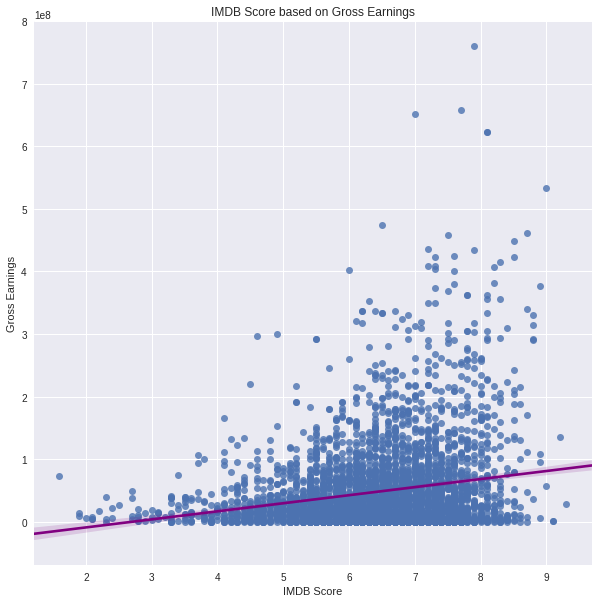

In [35]:
f, ax = plt.subplots(figsize=(10,10))
sns.regplot(x="imdb_score", y="gross", data=mc, line_kws={"color": "purple"})
plt.title("IMDB Score based on Gross Earnings")
plt.xlabel("IMDB Score")
plt.ylabel("Gross Earnings")

#### Number of Voted Users

Text(0,0.5,u'Number of Voted Users')

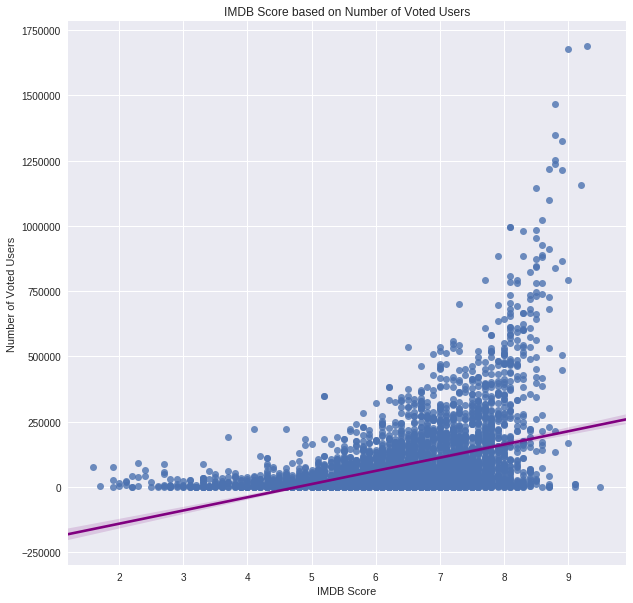

In [36]:
f, ax = plt.subplots(figsize=(10,10))
sns.regplot(x="imdb_score", y="num_voted_users", data=mc, line_kws={"color": "purple"})
plt.title("IMDB Score based on Number of Voted Users")
plt.xlabel("IMDB Score")
plt.ylabel("Number of Voted Users")

#### Cast Total Facebook Likes

Text(0,0.5,u'Cast Total Facebook Likes')

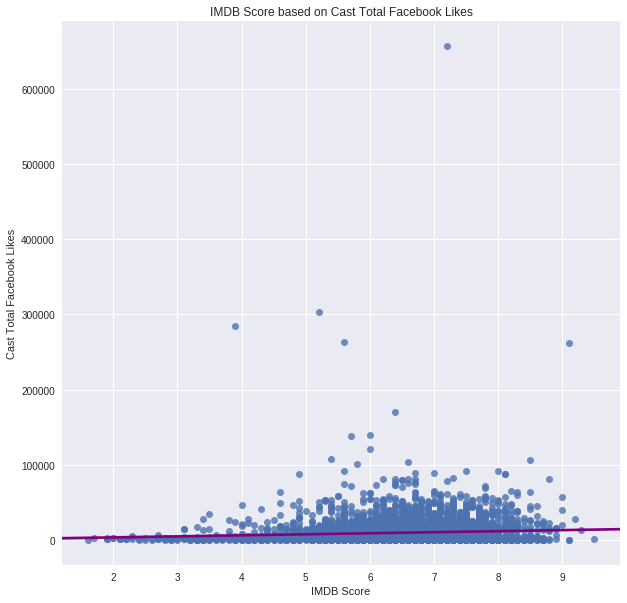

In [37]:
f, ax = plt.subplots(figsize=(10,10))
sns.regplot(x="imdb_score", y="cast_total_facebook_likes", data=mc, line_kws={"color": "purple"})
plt.title("IMDB Score based on Cast Total Facebook Likes")
plt.xlabel("IMDB Score")
plt.ylabel("Cast Total Facebook Likes")

#### Budget

Text(0,0.5,u'Budget')

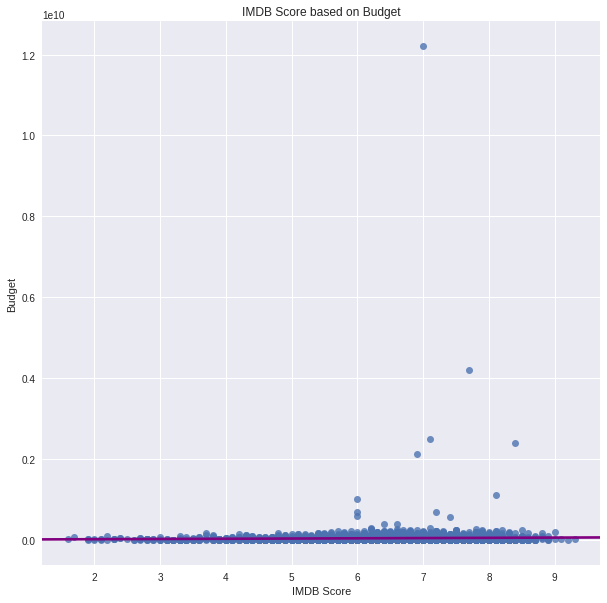

In [38]:
f, ax = plt.subplots(figsize=(10,10))
sns.regplot(x="imdb_score", y="budget", data=mc, line_kws={"color": "purple"})
plt.title("IMDB Score based on Budget")
plt.xlabel("IMDB Score")
plt.ylabel("Budget")

#### Profit

Text(0,0.5,u'Profit')

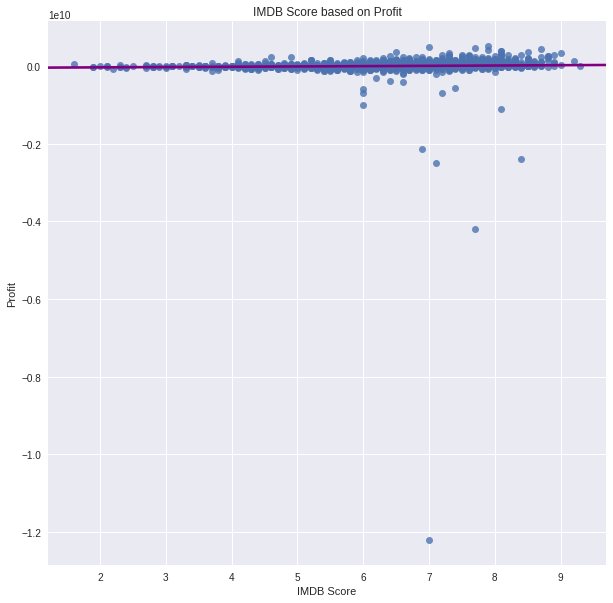

In [39]:
f, ax = plt.subplots(figsize=(10,10))
sns.regplot(x="imdb_score", y="Profit", data=mc, line_kws={"color": "purple"})
plt.title("IMDB Score based on Profit")
plt.xlabel("IMDB Score")
plt.ylabel("Profit")

### Heatmap

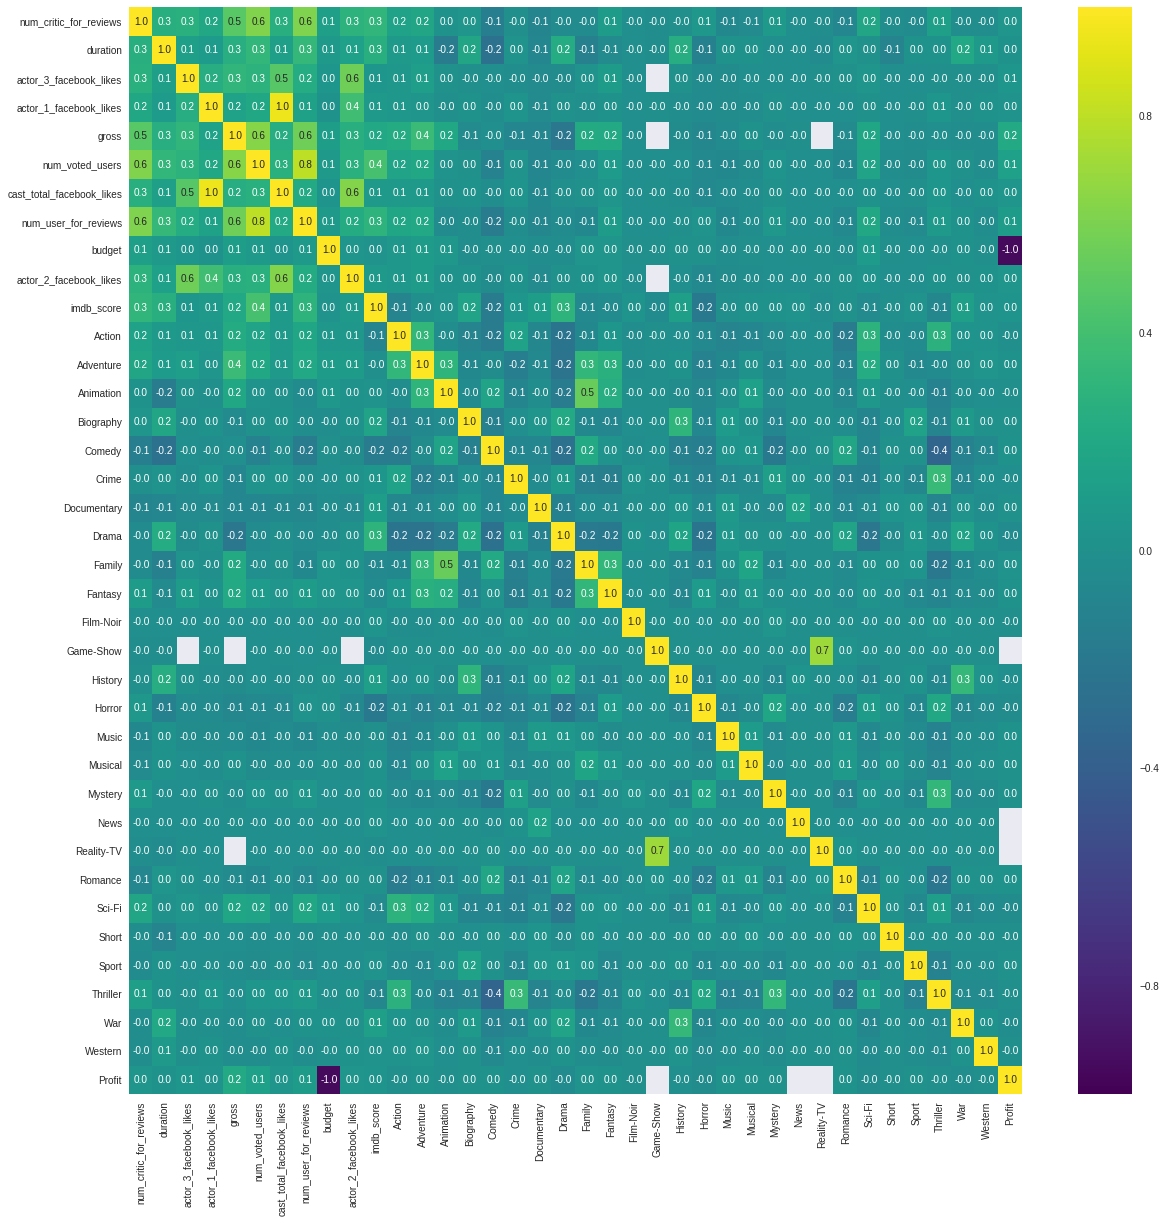

In [40]:
plt.figure(figsize=(20,20))
sns.heatmap(mc.corr(), annot=True, fmt='.1f', cmap="viridis")

In [41]:
corr = pd.DataFrame(mc.corr()['imdb_score'].drop('imdb_score'))
corr.sort_values(['imdb_score'], ascending = False)

,imdb_score
num_voted_users,0.410965
num_critic_for_reviews,0.305303
Drama,0.294229
num_user_for_reviews,0.292475
duration,0.261662
gross,0.198021
Biography,0.156310
History,0.117962
War,0.117279
Documentary,0.102859


### Correlation data:
1. num_voted_users has the highest correlation to imdb_score of .41
- num_critic_for_reviews also has a high correlation with .30
- num_user_for_reviews is good with .29
- duration is good with .26
- gross has an okay correlation of .19
<br> <br>
Therefore, *num_voted_users* has the highest correlation to imbd_score followed by *num_critic_for_reviews, num_user_for_reviews, duration*, and *gross*

# <center>Analysis

The highest correlation was the number of users who voted for the movie. This could be because it was a very popular movie and many people wanted to vote on imdb for this movie. This analysis can also be used for the number of critics who reviewed the movie and the number of users who reviewed these movies. <br> <br>
The top 3 correlations to a higher imdb score all surround the popularity of the movie and the impact it causes for users and critics. <br> <br>
The duration plays a part as well, but not as much as the general popularity of the movie and the ability to make users and critics want to review and vote for this movie. <br> <br>
When trying to figure out what makes a movie have a higher imdb score, I would focus on the popularity of the movie and the advertising campaign. How many users knew about this movie and were extremely excited to see it? What effect did the movie have on the users? Was it a call to action or a movie that really made them think and made them vote on it? These are all factors to consider when dealing with imdb score.

# <center> Part 2: <br> Modeling, Evaluation, & Deployment

# 5. Building regression

In [42]:
import sklearn.linear_model as lm
from sklearn.metrics import mean_squared_error
from sklearn.metrics import explained_variance_score

import statsmodels.api as sm
from statsmodels.formula.api import ols

#lasso regression
from sklearn import linear_model

#f_regression (feature selection)
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import SelectKBest

# recursive feature selection (feature selection)
from sklearn.feature_selection import RFE

/usr/local/lib/python2.7/dist-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [0]:
#create a new dataframe and drop all null values
md = mc.dropna()

In [0]:
#drop categorical values
md = md.drop(['movie_title','director_name'], axis=1)

### Lasso Regression Model

In [45]:
md.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3879 entries, 0 to 5042
Data columns (total 38 columns):
num_critic_for_reviews       3879 non-null float64
duration                     3879 non-null float64
actor_3_facebook_likes       3879 non-null float64
actor_1_facebook_likes       3879 non-null float64
gross                        3879 non-null float64
num_voted_users              3879 non-null int64
cast_total_facebook_likes    3879 non-null int64
num_user_for_reviews         3879 non-null float64
budget                       3879 non-null float64
actor_2_facebook_likes       3879 non-null float64
imdb_score                   3879 non-null float64
Action                       3879 non-null int64
Adventure                    3879 non-null int64
Animation                    3879 non-null int64
Biography                    3879 non-null int64
Comedy                       3879 non-null int64
Crime                        3879 non-null int64
Documentary                  3879 non-null

In [0]:
#assigning columns to X and Y variables
y = md['imdb_score']
X = md.drop(['imdb_score'], axis=1)

In [47]:
#Fit the model
m1 = lm.Lasso(alpha=.1)
m1.fit(X, y)
m1_y = m1.predict(X)

/usr/local/lib/python2.7/dist-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [48]:
print 'Coefficients: ', m1.coef_
print "y-intercept ", m1.intercept_

Coefficients:  [ 1.18052396e-03  1.05750286e-02  7.02504002e-05  7.63137195e-05
 -1.68993277e-09  3.94605537e-06 -7.59132512e-05 -5.08870775e-04
  1.19224286e-11  7.82919680e-05 -0.00000000e+00 -0.00000000e+00
  0.00000000e+00  0.00000000e+00 -0.00000000e+00  0.00000000e+00
  0.00000000e+00  1.00497826e-01 -0.00000000e+00 -0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00 -0.00000000e+00
  0.00000000e+00  0.00000000e+00 -0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -0.00000000e+00  0.00000000e+00
  0.00000000e+00 -0.00000000e+00  0.00000000e+00  0.00000000e+00
  5.75422724e-11]
y-intercept  4.972425489985989


In [49]:
coef = ["%.3f" % i for i in m1.coef_]
xcolumns = [ i for i in X.columns ]
zip(xcolumns, coef)

[('num_critic_for_reviews', '0.001'),
 ('duration', '0.011'),
 ('actor_3_facebook_likes', '0.000'),
 ('actor_1_facebook_likes', '0.000'),
 ('gross', '-0.000'),
 ('num_voted_users', '0.000'),
 ('cast_total_facebook_likes', '-0.000'),
 ('num_user_for_reviews', '-0.001'),
 ('budget', '0.000'),
 ('actor_2_facebook_likes', '0.000'),
 ('Action', '-0.000'),
 ('Adventure', '-0.000'),
 ('Animation', '0.000'),
 ('Biography', '0.000'),
 ('Comedy', '-0.000'),
 ('Crime', '0.000'),
 ('Documentary', '0.000'),
 ('Drama', '0.100'),
 ('Family', '-0.000'),
 ('Fantasy', '-0.000'),
 ('Film-Noir', '0.000'),
 ('Game-Show', '0.000'),
 ('History', '0.000'),
 ('Horror', '-0.000'),
 ('Music', '0.000'),
 ('Musical', '0.000'),
 ('Mystery', '-0.000'),
 ('News', '0.000'),
 ('Reality-TV', '0.000'),
 ('Romance', '0.000'),
 ('Sci-Fi', '-0.000'),
 ('Short', '0.000'),
 ('Sport', '0.000'),
 ('Thriller', '-0.000'),
 ('War', '0.000'),
 ('Western', '0.000'),
 ('Profit', '0.000')]

In [50]:
a = zip(xcolumns, coef)
las = pd.DataFrame(a)
las.sort_values(1, ascending=False)

,0,1
17,Drama,0.100
1,duration,0.011
0,num_critic_for_reviews,0.001
16,Documentary,0.000
35,Western,0.000
34,War,0.000
32,Sport,0.000
31,Short,0.000
29,Romance,0.000
28,Reality-TV,0.000


This shows the variables and their coefficients

In [51]:
las = las.rename(columns={0: 'columns', 1: 'coef'})
las = las.set_index('columns')
las.head(2)

,coef
columns,
num_critic_for_reviews,0.001
duration,0.011


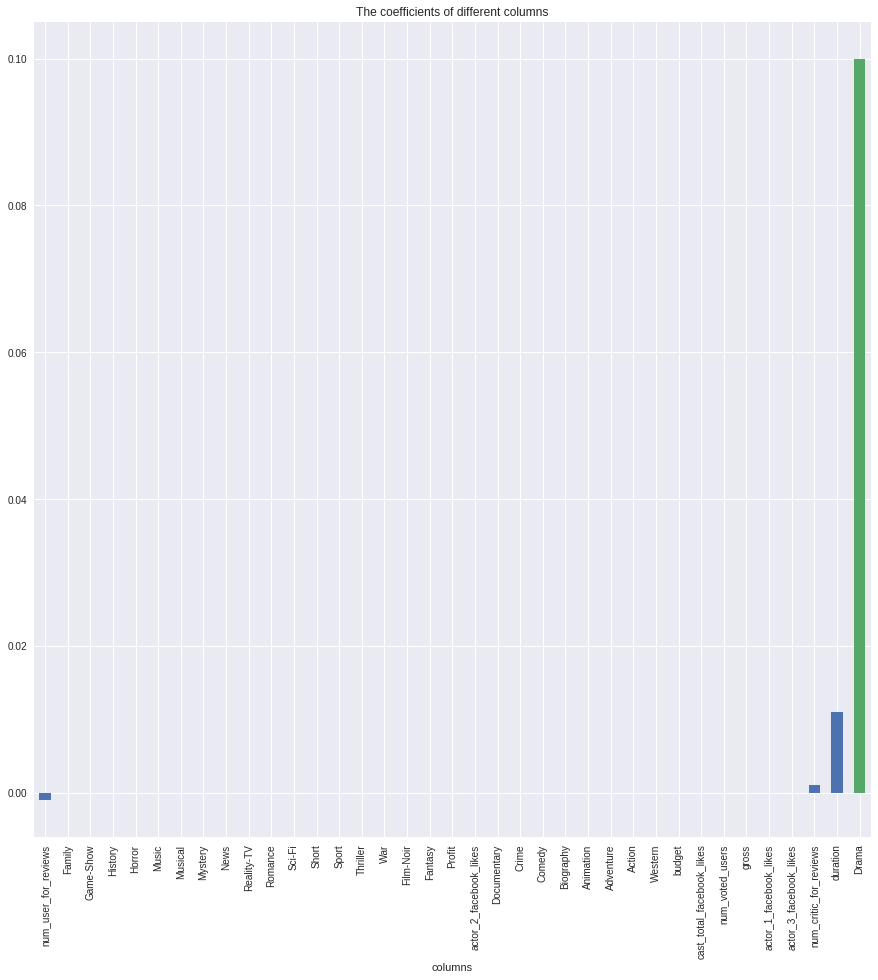

In [52]:
las=las['coef'].astype(float)
las.sort_values().plot.bar(figsize=(15,15),title='The coefficients of different columns')

**This shows the distribution of coefficients. Drama, duration, num_critic_for_reviews, and num_user_for reviews were all determined to be important features.**

In [53]:
print "mean square error: ", mean_squared_error(y, m1_y)
print "variance or r-squared: ", explained_variance_score(y, m1_y)

mean square error:  0.740683483818783
variance or r-squared:  0.33618945695062163


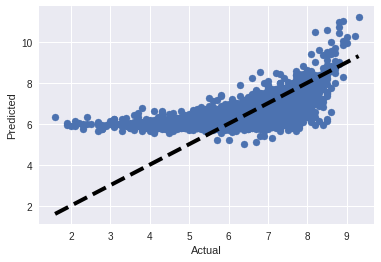

In [54]:
plt.subplots()
plt.scatter(y, m1_y)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

**This is 33% accurate, which is pretty low. The predicted does not match up to the actual values. The MSE value is .74**

### f-Regression Model

In [55]:
#I did this regression model with a different k each time, and k = 8 had the highest r-squared value
X_new = SelectKBest(f_regression, k=8).fit_transform(X, y)
X_new

/usr/local/lib/python2.7/dist-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in divide
  corr /= X_norms
/usr/local/lib/python2.7/dist-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/usr/local/lib/python2.7/dist-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/usr/local/lib/python2.7/dist-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


array([[7.23000000e+02, 1.78000000e+02, 7.60505847e+08, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [3.02000000e+02, 1.69000000e+02, 3.09404152e+08, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [6.02000000e+02, 1.48000000e+02, 2.00074175e+08, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [5.60000000e+01, 8.10000000e+01, 2.04092000e+06, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [1.40000000e+01, 9.50000000e+01, 4.58400000e+03, ...,
        1.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [4.30000000e+01, 9.00000000e+01, 8.52220000e+04, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [56]:
model2 = lm.LinearRegression()
model2.fit(X_new, y)
model2_y = model2.predict(X_new)

print "mean square error: ", mean_squared_error(y, model2_y)
print "variance or r-squared: ", explained_variance_score(y, model2_y)

mean square error:  0.6975511556666878
variance or r-squared:  0.37484523205445974


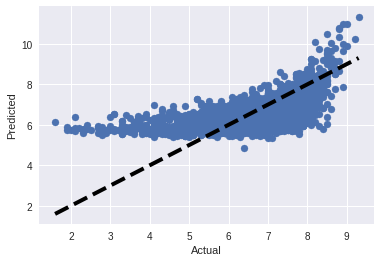

In [57]:
plt.subplots()
plt.scatter(y, model2_y)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

**This model does not do a great job of predicting data. It has a 37% accuracy and the MSE is .69**

### RFE

In [58]:
lr = lm.LinearRegression()
rfe = RFE(lr, n_features_to_select=2)
rfe_y = rfe.fit(X,y)

print "Features sorted by their rank:"
print sorted(zip(map(lambda x: x, rfe.ranking_), X.columns))

Features sorted by their rank:
[(1, 'Film-Noir'), (1, 'Short'), (2, 'Documentary'), (3, 'Drama'), (4, 'Animation'), (5, 'Horror'), (6, 'Comedy'), (7, 'Family'), (8, 'Biography'), (9, 'Music'), (10, 'Thriller'), (11, 'War'), (12, 'Action'), (13, 'Romance'), (14, 'Adventure'), (15, 'Crime'), (16, 'History'), (17, 'Mystery'), (18, 'Sci-Fi'), (19, 'Sport'), (20, 'Western'), (21, 'Fantasy'), (22, 'duration'), (23, 'Musical'), (24, 'num_critic_for_reviews'), (25, 'num_user_for_reviews'), (26, 'actor_3_facebook_likes'), (27, 'actor_1_facebook_likes'), (28, 'actor_2_facebook_likes'), (29, 'cast_total_facebook_likes'), (30, 'Profit'), (31, 'budget'), (32, 'gross'), (33, 'num_voted_users'), (34, 'Game-Show'), (35, 'Reality-TV'), (36, 'News')]


### Random Forest Regressor

In [59]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

regr = RandomForestRegressor(random_state=0)
regr.fit(X, y)
regr_predicted = regr.predict(X)

print "mean square error: ", mean_squared_error(y, regr_predicted)
print "variance or r-squared: ", explained_variance_score(y, regr_predicted)

mean square error:  0.09491270946120135
variance or r-squared:  0.9149396845771616


In [60]:
sorted(zip(regr.feature_importances_, X.columns))

[(0.0, 'Game-Show'),
 (0.0, 'News'),
 (0.0, 'Reality-TV'),
 (0.0, 'Short'),
 (1.1503682584716215e-06, 'Film-Noir'),
 (0.00031313048082981965, 'Western'),
 (0.0007012889764094961, 'History'),
 (0.0012012441446137849, 'War'),
 (0.0019013328502119932, 'Sport'),
 (0.002401427135597942, 'Musical'),
 (0.002703755505298034, 'Family'),
 (0.002988185053086943, 'Romance'),
 (0.0029887357735515034, 'Music'),
 (0.0030335967786418944, 'Adventure'),
 (0.0031312430181611164, 'Mystery'),
 (0.003384687739941796, 'Crime'),
 (0.00383133697660725, 'Biography'),
 (0.003845492763631958, 'Fantasy'),
 (0.0038908754625976366, 'Action'),
 (0.0038995581202663013, 'Sci-Fi'),
 (0.005063741309846406, 'Comedy'),
 (0.00571020209291029, 'Thriller'),
 (0.00875612180409183, 'Animation'),
 (0.01048278646237872, 'Horror'),
 (0.014156372301340078, 'Documentary'),
 (0.02187280154004318, 'actor_1_facebook_likes'),
 (0.026190806705427932, 'actor_2_facebook_likes'),
 (0.031771730719687995, 'Profit'),
 (0.03465506477671607, 'ca

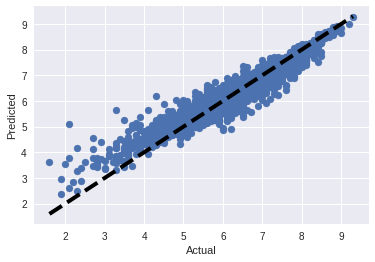

In [61]:
plt.subplots()
plt.scatter(y, regr_predicted)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

**This is a great model. The accuracy is 91% and the MSE is .09. This model would be able to accurately predict variables 91% of the time**

# 6. Classification

In [62]:
#assign categories of imdb score from bad (1) to good (4) 
md['mov_category'] = 1
md['mov_category'][(md['imdb_score'] > 4) & (md['imdb_score'] <= 6)] = 2
md['mov_category'][(md['imdb_score'] > 6) & (md['imdb_score'] <= 8)] = 3
md['mov_category'][md['imdb_score'] < 8] = 4

md.head(2)

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,num_critic_for_reviews,duration,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,num_user_for_reviews,budget,actor_2_facebook_likes,imdb_score,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,Film-Noir,Game-Show,History,Horror,Music,Musical,Mystery,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Thriller,War,Western,Profit,mov_category
0,723.0,178.0,855.0,1000.0,760505847.0,886204,4834,3054.0,237000000.0,936.0,7.9,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,523505847.0,4
1,302.0,169.0,1000.0,40000.0,309404152.0,471220,48350,1238.0,300000000.0,5000.0,7.1,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9404152.0,4


### Random Forest Classifier

In [0]:
#import decisiontreeclassifier
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
#for validating your classification model
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import roc_curve, auc

In [0]:
md =md.drop(['imdb_score'], axis=1)
y = md['mov_category']
X = md.drop(['mov_category'], axis=1)

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=50)
clf=clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.9630584192439863

In [66]:
print 'overall accuracy:'
print metrics.accuracy_score(y_test, clf.predict(X_test))

overall accuracy:
0.9630584192439863


In [67]:
print metrics.confusion_matrix(y_test, clf.predict(X_test))

[[  20    0   25]
 [   2    1   14]
 [   2    0 1100]]


In [68]:
print metrics.classification_report(y_test, clf.predict(X_test))

             precision    recall  f1-score   support

          1       0.83      0.44      0.58        45
          3       1.00      0.06      0.11        17
          4       0.97      1.00      0.98      1102

avg / total       0.96      0.96      0.95      1164



**This is a good model because the accuracy is 96%.**

### Knn

In [0]:
from sklearn.neighbors import KNeighborsClassifier

In [70]:
y = md['mov_category']
X = md.drop(['mov_category'], axis=1)
# evaluate the model by splitting into train and test sets & develop knn model (name it as knn)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
# initialize KNeighborsClassifier() and train a KNN Model
#n_neighbors was decided based upon the optimal value of k graph below
knn = KNeighborsClassifier(n_neighbors=28)
knn.fit(X_train, y_train)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=28, p=2,
           weights='uniform')

In [71]:
#ignore depreciation warnings because we are on an old python version
#https://stackoverflow.com/questions/879173/how-to-ignore-deprecation-warnings-in-python
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

print 'overall accuracy:'
print metrics.accuracy_score(y_test, knn.predict(X_test))

overall accuracy:
0.9467353951890034


In [72]:
#ignore depreciation warnings because we are on an old python version
#https://stackoverflow.com/questions/879173/how-to-ignore-deprecation-warnings-in-python
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

print metrics.confusion_matrix(y_test, knn.predict(X_test)) 

[[   0    0   45]
 [   0    0   17]
 [   0    0 1102]]


In [73]:
#ignore depreciation warnings because we are on an old python version
#https://stackoverflow.com/questions/879173/how-to-ignore-deprecation-warnings-in-python
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

print metrics.classification_report(y_test, knn.predict(X_test))

             precision    recall  f1-score   support

          1       0.00      0.00      0.00        45
          3       0.00      0.00      0.00        17
          4       0.95      1.00      0.97      1102

avg / total       0.90      0.95      0.92      1164



/usr/local/lib/python2.7/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Text(0,0.5,u'accuracy')

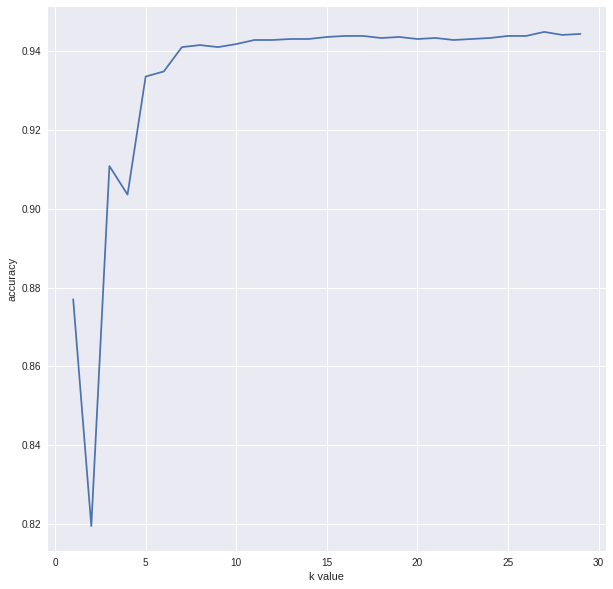

In [74]:
# search for an optimal value of K
k_range = range(1, 30)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores.append(np.mean(cross_val_score(knn, X, y, cv=10, scoring='accuracy')))

# plot the K values (x-axis) versus the 10-fold CV score (y-axis)
plt.figure(figsize=(10,10))
plt.plot(k_range, scores)
plt.xlabel('k value')
plt.ylabel('accuracy')

### Feature Selection

In [0]:
#import logisticregression classifier
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm

In [76]:
model = LogisticRegression()
rfe = RFE(model, 4)  #asking four best attributes
rfe = rfe.fit(X, y)
# summarize the selection of the attributes
print(rfe.support_)
print(rfe.ranking_)

[False False False False False False False False False False False False
 False False  True False False False False False False False False  True
 False False False False False  True False False False  True False False
 False]
[18 17 20 22 27 24 21 19 26 23  6 11 29 14  1 12  7 10 15 16 31 33 13  1
  2  3  4 32 34  1  9 30  5  1  8 25 28]


In [77]:
X.head(1)

,num_critic_for_reviews,duration,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,num_user_for_reviews,budget,actor_2_facebook_likes,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,Film-Noir,Game-Show,History,Horror,Music,Musical,Mystery,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Thriller,War,Western,Profit
0,723.0,178.0,855.0,1000.0,760505847.0,886204,4834,3054.0,237000000.0,936.0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,523505847.0


In [78]:
# Features sorted by their rank
pd.DataFrame({'feature':X.columns, 'importance':rfe.ranking_}).sort_values('importance').head(5)

,feature,importance
14,Comedy,1
23,Horror,1
33,Thriller,1
29,Romance,1
24,Music,2


In [79]:
#here I select 4 most significant features only
X_logistic = md[['Comedy', 'Horror', 'Thriller', 'Romance']]
print X_logistic.head(5)

   Comedy  Horror  Thriller  Romance
0  0       0       0         0      
1  0       0       0         0      
2  0       0       1         0      
3  0       0       1         0      
5  0       0       0         0      


In [80]:
X_train, X_test, y_train, y_test = train_test_split(X_logistic, y, test_size=0.3, random_state=0)
lr = LogisticRegression()
lr.fit(X_train, y_train)

#Model evaluation
print metrics.accuracy_score(y_test, lr.predict(X_test))
print metrics.confusion_matrix(y_test, lr.predict(X_test))
print metrics.classification_report(y_test, lr.predict(X_test))

0.9467353951890034
[[   0    0   45]
 [   0    0   17]
 [   0    0 1102]]
             precision    recall  f1-score   support

          1       0.00      0.00      0.00        45
          3       0.00      0.00      0.00        17
          4       0.95      1.00      0.97      1102

avg / total       0.90      0.95      0.92      1164



### Model Validation

In [81]:
# evaluate the random forest classifier model using 10-fold cross-validation because this model had the highest accuracy
scores = cross_val_score(clf, X, y, scoring='accuracy', cv=10)
print scores
print scores.mean()

[0.92564103 0.97179487 0.96915167 0.95876289 0.97157623 0.96124031
 0.97674419 0.96382429 0.95090439 0.95090439]
0.9600544253434606


This trains and tests the data to validate it. 

# 7. Clustering

In [0]:
#limiting the dataset to only columns I identified as important in feature selection
col_list = ['Comedy','Horror','Thriller','Romance','mov_category']
md = md[col_list]

In [83]:
!pip install scikit-plot
import pylab as pl
from sklearn.cluster import KMeans
import scikitplot as skplt

  Running setup.py bdist_wheel for scikit-plot ... - done
  Stored in directory: /root/.cache/pip/wheels/a7/ac/fe/750d7565f5d867f9fd82b2408a76a6170d21ef0628d30502ec
Successfully built scikit-plot


In [84]:
md.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3879 entries, 0 to 5042
Data columns (total 5 columns):
Comedy          3879 non-null int64
Horror          3879 non-null int64
Thriller        3879 non-null int64
Romance         3879 non-null int64
mov_category    3879 non-null int64
dtypes: int64(5)
memory usage: 341.8 KB


In [85]:
#normalizing
mdn = (md - md.mean()) / (md.max() - md.min())
mdn.head(1)

,Comedy,Horror,Thriller,Romance,mov_category
0,-0.389533,-0.102346,-0.291054,-0.228667,0.046404


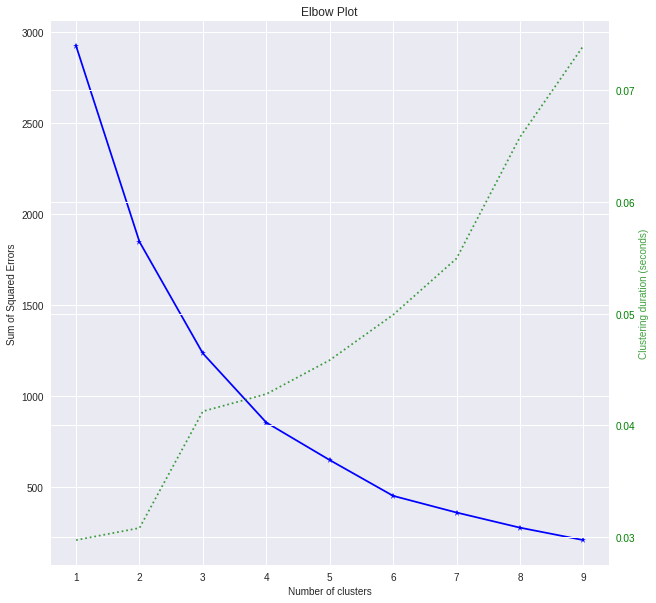

In [86]:
kmeans = KMeans(random_state=1) 
skplt.cluster.plot_elbow_curve(kmeans, mdn, cluster_ranges=range(1, 10), figsize=(10,10))

In [87]:
mdn.var()

Comedy          0.237858
Horror          0.091895
Thriller        0.206395
Romance         0.176424
mov_category    0.041167
dtype: float64

In [88]:
#clustering with KMeans
k_means = KMeans(init='k-means++', n_clusters=4, random_state=0)
k_means.fit(mdn)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

In [89]:
k_means.labels_

array([1, 1, 3, ..., 3, 2, 1], dtype=int32)

In [90]:
k_means.cluster_centers_

array([[ 0.20898878, -0.09372528, -0.26519233,  0.77133282,  0.02505724],
       [-0.38953338,  0.03085678, -0.2910544 , -0.22866718, -0.05643664],
       [ 0.61046662, -0.06384646, -0.21701688, -0.22866718,  0.02666038],
       [-0.37791673,  0.10578569,  0.7089456 , -0.15606312,  0.00994034]])

In [91]:
#creating a cluster column
km1 = pd.DataFrame(k_means.labels_, columns = ['cluster'])
km1.head()

,cluster
0,1
1,1
2,3
3,3
4,1


In [92]:
#joining the cluster column to the table
km2 = mdn.join(km1)
km2.head(2)

,Comedy,Horror,Thriller,Romance,mov_category,cluster
0,-0.389533,-0.102346,-0.291054,-0.228667,0.046404,1.0
1,-0.389533,-0.102346,-0.291054,-0.228667,0.046404,1.0


In [93]:
#seeing how many movies are in each cluster
km2.groupby('cluster').size()

cluster
0.0    680
1.0    877
2.0    862
3.0    895
dtype: int64

In [94]:
km2.groupby('cluster').mean()

,Comedy,Horror,Thriller,Romance,mov_category
cluster,,,,,
0.0,0.004584,0.005007,0.025122,0.036039,-0.003596
1.0,0.008414,-0.014547,-0.039059,-0.004038,-0.000727
2.0,-0.007863,-0.010699,0.030291,-0.005929,0.005414
3.0,0.001528,-0.014078,0.050845,-0.006321,0.009532


Text(0.5,1,u'Comedy cluster')

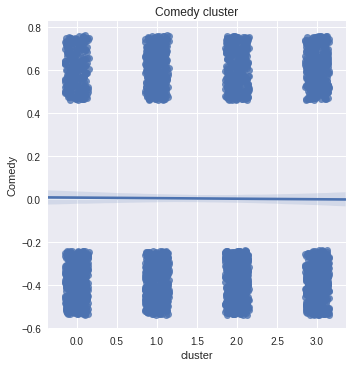

In [95]:
sns.lmplot("cluster", "Comedy", km2, x_jitter=.15, y_jitter=.15, size=5)
#https://stackoverflow.com/questions/46307941/how-can-i-add-title-on-seaborn-lmplot
ax = plt.gca()
ax.set_title("Comedy cluster")

Text(0.5,1,u'Horror cluster')

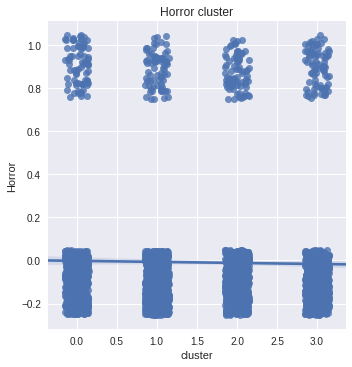

In [96]:
sns.lmplot("cluster", "Horror", km2, x_jitter=.15, y_jitter=.15, size=5)
ax = plt.gca()
ax.set_title("Horror cluster")

Text(0.5,1,u'Thriller cluster')

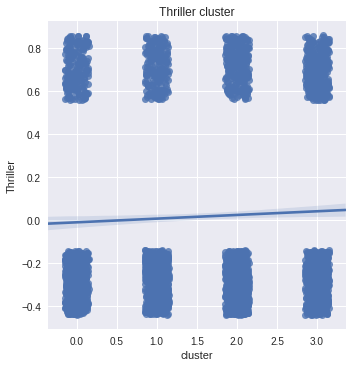

In [97]:
sns.lmplot("cluster", "Thriller", km2, x_jitter=.15, y_jitter=.15, size=5)
ax = plt.gca()
ax.set_title("Thriller cluster")

Text(0.5,1,u'Romance cluster')

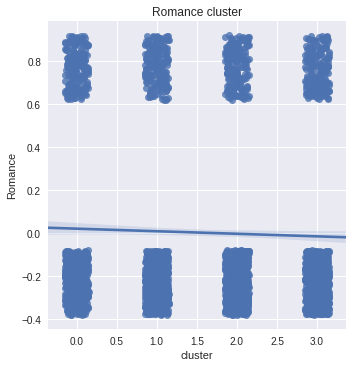

In [98]:
sns.lmplot("cluster", "Romance", km2, x_jitter=.15, y_jitter=.15, size=5)
ax = plt.gca()
ax.set_title("Romance cluster")

Text(0.5,1,u'Movie Category Cluster')

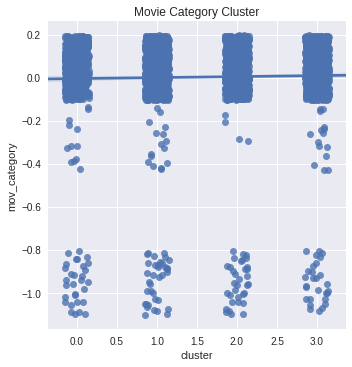

In [99]:
sns.lmplot("cluster", "mov_category", km2, x_jitter=.15, y_jitter=.15, size=5)
ax = plt.gca()
ax.set_title("Movie Category Cluster")

**Profiling**


*  Cluster 0 is a Romance and has a low imdb score
*   Cluster 1 is a Comedy and has a low imdb score
*   Cluster 2 is a Thriller and has a high imdb score
* Cluster 3 is a Thriller and has a high imdb score





In [100]:
km2.groupby('cluster').mean()

,Comedy,Horror,Thriller,Romance,mov_category
cluster,,,,,
0.0,0.004584,0.005007,0.025122,0.036039,-0.003596
1.0,0.008414,-0.014547,-0.039059,-0.004038,-0.000727
2.0,-0.007863,-0.010699,0.030291,-0.005929,0.005414
3.0,0.001528,-0.014078,0.050845,-0.006321,0.009532


# Analysis

*   Using feature selection, the most important factor to imdb_score is whether the movie is a comedy, horror, thriller, or romance
*   it seems that Random Forest Classifier is the best model because it has a 96% accuracy
*   Knn and Random Forest Regressor were also good models because they had high accuracy
*   Redo-ing the models several times showed me which models used all of the variables and which were better using variables chosen with feature selection. Random Forest Classifier used all of the variables

